In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset

dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Taking the required input columns

x = dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

<function matplotlib.pyplot.show(*args, **kw)>

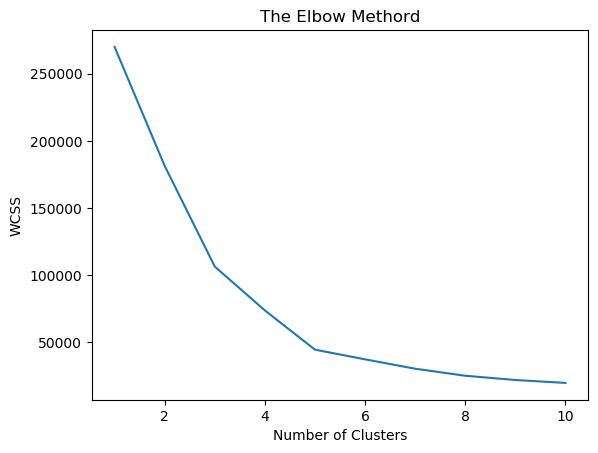

In [8]:
# Finding the number of clusters for Kmeans using Elbow chart

from sklearn.cluster import KMeans
list_inertia = []
for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    list_inertia.append(kmeans.inertia_)
        
plt.plot(range(1,11),list_inertia) 
plt.title('The Elbow Methord')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show


In [11]:
# Creating the KMeans model using the perfect number of clusters and clustering the input

from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_mean = kmean.fit_predict(x)
y_mean

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [13]:
# creating a column for storing the cluster groups in the dataset

supervised = dataset
supervised['cluster_group'] = y_mean
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [14]:
# Saving the dataset with cluster as a csv file

supervised.to_csv('Clustered_Mall_Customers.csv', index = False)

In [16]:
# Finding the centroids

centroids = kmean.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [21]:
dir(kmean)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

In [22]:
labels = kmean.labels_
from sklearn.metrics import silhouette_score
S_score = silhouette_score(x, labels, metric="sqeuclidean")
print("Silhouette Coefficient: %0.3f" % S_score)

Silhouette Coefficient: 0.740


In [17]:
# Installing seaborn

!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00


C:\Users\reema\anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


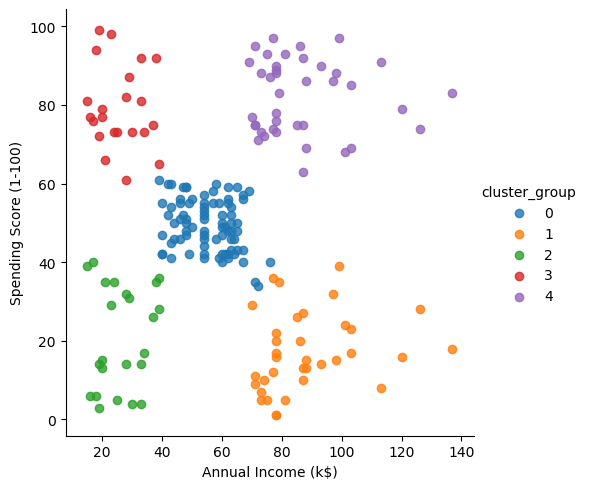

In [19]:
# Importing deaborn and creating the lmplot to visualize the cluster 

import seaborn as sns
facet = sns.lmplot(data = supervised, x = supervised.columns[3], y = supervised.columns[4], hue = supervised.columns[5],
                   fit_reg = False, legend = True, legend_out = True)